<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Find-total-quantity-of-product-involved-in-energy" data-toc-modified-id="Find-total-quantity-of-product-involved-in-energy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Find total quantity of product involved in energy</a></span></li><li><span><a href="#Product-Classes" data-toc-modified-id="Product-Classes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Product Classes</a></span></li><li><span><a href="#Oil-Production-from-all-nations" data-toc-modified-id="Oil-Production-from-all-nations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Oil Production from all nations</a></span></li><li><span><a href="#Coal-Peat-and-Oil-Shale-Production-from-all-nations" data-toc-modified-id="Coal-Peat-and-Oil-Shale-Production-from-all-nations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Coal Peat and Oil Shale Production from all nations</a></span></li><li><span><a href="#Natural-Manufactured-or-Recovered-Natural-Gas-Production-for-all-nations" data-toc-modified-id="Natural-Manufactured-or-Recovered-Natural-Gas-Production-for-all-nations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Natural Manufactured or Recovered Natural Gas Production for all nations</a></span></li><li><span><a href="#Electricity-Production" data-toc-modified-id="Electricity-Production-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Electricity Production</a></span></li></ul></div>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import collections

In [2]:
energy_df = pd.read_csv("all_energy_statistics.csv")
energy_df.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


In [3]:
# expand all column widths so that entire strings can be read in each cell
pd.options.display.max_colwidth = 200

In [4]:
# identify the types of objects in the data frame
energy_df.info()

# data is missing from the quantity footnotes column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189482 entries, 0 to 1189481
Data columns (total 7 columns):
country_or_area          1189482 non-null object
commodity_transaction    1189482 non-null object
year                     1189482 non-null int64
unit                     1189482 non-null object
quantity                 1189482 non-null float64
quantity_footnotes       163946 non-null float64
category                 1189482 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 63.5+ MB


In [5]:
# find number of unique values in each column
print(f"Number of Unique Countries {energy_df.country_or_area.nunique()}")
print(f"Number of Unique Products {energy_df.category.nunique()}")
print(f"Number of Unique Transactions {energy_df.commodity_transaction.nunique()}")
print(f"Different Units of Measure {energy_df.unit.nunique()}")
print(f"Different FootNote Values {energy_df.quantity_footnotes.nunique()}")

Number of Unique Countries 243
Number of Unique Products 71
Number of Unique Transactions 2452
Different Units of Measure 6
Different FootNote Values 1


In [6]:
latest_year = energy_df['year'].max()
earliest_year = energy_df['year'].min()

print(f'Earliest year: {earliest_year} \nLatest year: {latest_year}')

Earliest year: 1990 
Latest year: 2014


# Find total quantity of product involved in energy

In [7]:
total_energy = energy_df.groupby(['category', 'unit']).mean().round(2).drop(['year', 'quantity_footnotes'], axis=1)
total_energy.head()

,,quantity
category,unit,
additives_and_oxygenates,"Metric tons, thousand",355.34
animal_waste,Terajoules,50930.30
anthracite,"Metric tons, thousand",534.20
aviation_gasoline,"Metric tons, thousand",18.19
bagasse,"Metric tons, thousand",3815.99


In [8]:
# reset index to plot quantity against products
total_energy = total_energy.reset_index()

In [9]:
total_energy = total_energy.sort_values(by=['quantity'], ascending=False)
total_energy.head()

,category,unit,quantity
11,brown_coal,"Metric tons, thousand",1967868.84
30,hard_coal,"Metric tons, thousand",1694778.49
41,natural_gas_including_lng,Terajoules,1343446.28
57,peat,"Metric tons, thousand",736122.47
17,conventional_crude_oil,"Metric tons, thousand",253327.06


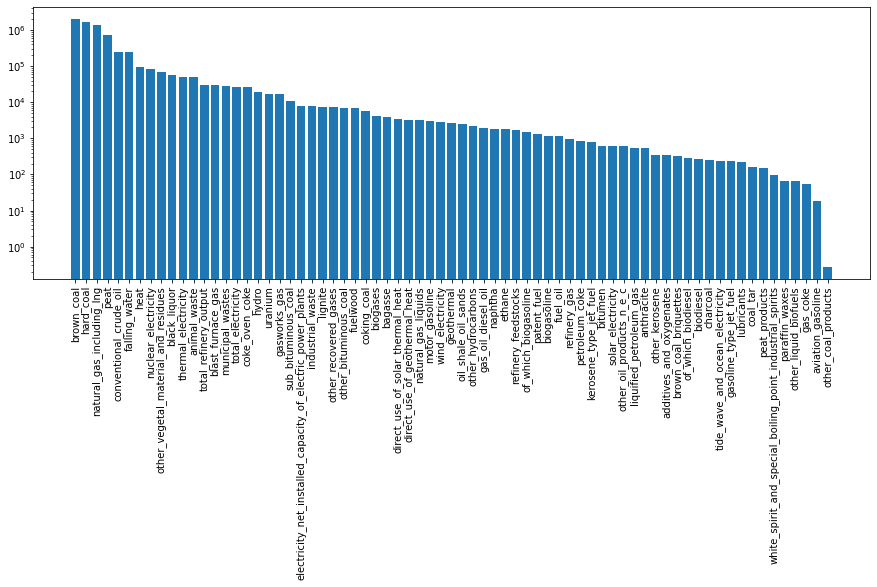

In [10]:
plt.figure(figsize=(15,5))

plt.bar(total_energy['category'], total_energy['quantity'])
plt.xticks(rotation=90)
plt.yscale('log')

plt.show()

# Product Classes

In [11]:
# The graph above shows how much of each product has been produced, transformed, exported, imported, and/or consumed 
# from 1990 to 2014 in any country. This is very general and does not provide much information.

# Need to break down this data into sections
#        *Products_Class
#        *Consumption
#        *Transformation Processes

In [12]:
# Drop FootNote Column
energy_df = energy_df.drop(['quantity_footnotes'], axis=1)

# Rename category column to product and add empty column named product class
energy_df = energy_df.rename(columns={"category":"product"})
energy_df["product_class"] = ''

In [13]:
energy_df.head()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,additives_and_oxygenates,
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,additives_and_oxygenates,
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,additives_and_oxygenates,
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,additives_and_oxygenates,
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,additives_and_oxygenates,


In [14]:
energy_df[energy_df['commodity_transaction'].str.contains("total")].head()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
121826,Albania,Lignite brown coal - total known reserves,2014,"Metric tons, thousand",727000.0,brown_coal,
121827,Albania,Lignite brown coal - total known reserves,2005,"Metric tons, thousand",794000.0,brown_coal,
121828,Albania,Lignite brown coal - total known reserves,2002,"Metric tons, thousand",712000.0,brown_coal,
121829,Albania,Lignite brown coal - total known reserves,2001,"Metric tons, thousand",712000.0,brown_coal,
121830,Albania,Lignite brown coal - total known reserves,2000,"Metric tons, thousand",712000.0,brown_coal,


In [15]:
energy_df[energy_df['commodity_transaction'].str.contains("Total")].head()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
1300,Argentina,Additives and Oxygenates - Total energy supply,2014,"Metric tons, thousand",369.0,additives_and_oxygenates,
1301,Argentina,Additives and Oxygenates - Total energy supply,2013,"Metric tons, thousand",379.0,additives_and_oxygenates,
1302,Argentina,Additives and Oxygenates - Total energy supply,2012,"Metric tons, thousand",393.0,additives_and_oxygenates,
1303,Argentina,Additives and Oxygenates - Total energy supply,2011,"Metric tons, thousand",355.0,additives_and_oxygenates,
1304,Argentina,Additives and Oxygenates - Total energy supply,2010,"Metric tons, thousand",418.0,additives_and_oxygenates,


In [16]:
# Need to convert all string to lower
energy_df['country_or_area'] = energy_df['country_or_area'].str.lower()
energy_df['commodity_transaction'] = energy_df['commodity_transaction'].str.lower()
energy_df['product'] = energy_df['product'].str.lower()

In [17]:
energy_df.head()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
0,austria,additives and oxygenates - exports,1996,"Metric tons, thousand",5.0,additives_and_oxygenates,
1,austria,additives and oxygenates - exports,1995,"Metric tons, thousand",17.0,additives_and_oxygenates,
2,belgium,additives and oxygenates - exports,2014,"Metric tons, thousand",0.0,additives_and_oxygenates,
3,belgium,additives and oxygenates - exports,2013,"Metric tons, thousand",0.0,additives_and_oxygenates,
4,belgium,additives and oxygenates - exports,2012,"Metric tons, thousand",35.0,additives_and_oxygenates,


In [18]:
# Create lists of product classes to compare products against
Oil_Class = ['additives_and_oxygenates', 'paraffin_waxes', 'conventional_crude_oil', 'natural_gas_liquids','other_hydrocarbons','aviation_gasoline','motor_gasoline','biogasoline','of_which_biogasoline','gasoline_type_jet_fuel','kerosene_type_jet_fuel','other_kerosene','gas_oil_diesel_oil','of_which_biodiesel','biodiesel','fuel_oil','liquified_petroleum_gas','refinery_feedstocks','naphtha','white_spirit_and_special_boiling_point_industrial_spirits','lubricants','bitumen','paraffin_waxes','petroleum_coke','refinery_gas','ethane','other_oil_products_n_e_c']
Coal_Peat_Oil_Shales_Class = ['hard_coal','anthracite','coking_coal','other_bituminous_coal','brown_coal','sub_bituminous_coal','lignite','peat','oil_shale_oil_sands','coke_oven_coke','gas_coke','patent_fuel','brown_coal_briquettes','peat_products','coal_tar','other_coal_products']
Natural_Manufactured_Recovered_Gas_Class = ['natural_gas_including_lng','gasworks_gas','coke_oven_gas','blast_furnace_gas','other_recovered_gases']
Electricity_Class = ['electricity_net_installed_capacity_of_electric_power_plants','electricity', 'hydro','nuclear_electricity','solar_electricity','thermal_electricity','tide_wave_and_ocean_electricity','total_electricity','total_refinery_output','wind_electricity','falling_water','geothermal']
Heat_Class = ['heat','direct_use_of_geothermal_heat','direct_use_of_solar_thermal_heat']
Biofuels_Waste_Class = ['fuelwood','charcoal','bagasse','animal_waste','other_vegetal_material_and_residues','municipal_wastes','industrial_waste','black_liquor','biogasoline','biodiesels','bio_jet_kerosene','other_liquid_biofuels','biogases','uranium']


In [19]:
energy_df.loc[energy_df["product"] == "natural_gas_including_lng"].max()

country_or_area                      yugoslavia, sfr (former)
commodity_transaction    natural gas (including lng) - vented
year                                                     2014
unit                                               Terajoules
quantity                                          2.12782e+09
product                             natural_gas_including_lng
product_class                                                
dtype: object

In [20]:
energy_dict = energy_df.to_dict()

In [21]:
def product_class(x,y):
    for product in energy_dict['product']:
        for products in x:
            if energy_dict['product'][product] == products:
                energy_dict['product_class'][product] = y

In [22]:
product_class(Oil_Class, 'Oil')
product_class(Coal_Peat_Oil_Shales_Class, 'Coal_Peat_or_Oil_Shales')
product_class(Natural_Manufactured_Recovered_Gas_Class, 'Natural_Manufactured_or_Recovered_Gas')
product_class(Electricity_Class, 'Electricity')
product_class(Heat_Class, 'Heat')
product_class(Biofuels_Waste_Class, "Biofuels_Waste")

In [23]:
# checking to see if function works
print(energy_dict['product_class'][170962])
print(energy_dict['product_class'][170960])
print(energy_dict['product_class'][84807])
print(energy_dict['product_class'][204398])
print(energy_dict['product_class'][198314])
print(energy_dict['product_class'][332737])

Oil
Coal_Peat_or_Oil_Shales
Natural_Manufactured_or_Recovered_Gas
Electricity
Heat
Biofuels_Waste


In [24]:
# check to ensure no empty strings
for product in energy_dict['product_class']:
    if energy_dict['product_class'][product] == '':
        print(energy_dict['product'][product])


In [25]:
energy_df = pd.DataFrame.from_dict(energy_dict)

In [26]:
energy_df.tail()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
1189477,viet nam,electricity - total wind production,2012,"Kilowatt-hours, million",92.0,wind_electricity,Electricity
1189478,viet nam,electricity - total wind production,2011,"Kilowatt-hours, million",87.0,wind_electricity,Electricity
1189479,viet nam,electricity - total wind production,2010,"Kilowatt-hours, million",50.0,wind_electricity,Electricity
1189480,viet nam,electricity - total wind production,2009,"Kilowatt-hours, million",10.0,wind_electricity,Electricity
1189481,viet nam,electricity - total wind production,2008,"Kilowatt-hours, million",1.0,wind_electricity,Electricity


In [27]:
# create dataframe for each of the product classes
Oil_df = energy_df[energy_df['product_class'] == 'Oil']
Coal_Peat_or_Oil_Shales_df = energy_df[energy_df['product_class'] == 'Coal_Peat_or_Oil_Shales']
Natural_Manufactured_or_Recovered_Gas_df = energy_df[energy_df['product_class'] == 'Natural_Manufactured_or_Recovered_Gas']
Electricity_df = energy_df[energy_df['product_class'] == 'Electricity']
Heat_df = energy_df[energy_df['product_class'] == 'Heat']
Biofuels_Waste_df = energy_df[energy_df['product_class'] == 'Biofuels_Waste']


In [28]:
# find all unique units from each dataframe to ensure all comparisons are valid

print(Oil_df.unit.unique())
print(Coal_Peat_or_Oil_Shales_df.unit.unique())
print(Natural_Manufactured_or_Recovered_Gas_df.unit.unique())
print(Electricity_df.unit.unique())
print(Heat_df.unit.unique())
print(Biofuels_Waste_df.unit.unique())


['Metric tons,  thousand']
['Metric tons,  thousand' 'Terajoules']
['Terajoules']
['Kilowatts,  thousand' 'Kilowatt-hours, million' 'Metric tons,  thousand']
['Terajoules']
['Terajoules' 'Metric tons,  thousand' 'Cubic metres, thousand'
 'Metric Tons']


In [29]:
# Oil, Natural Gas, and Heat dataframes all have one unit of measure
# Coal Peat and Shale has mass and energy units of measure, respectively
# Electricity has power, energy, and mass units of measure, respectivey
# Biofuels and Waste has energy, two mass units (separated by 3 orders of magnitude), and volume units of measure, respectivey

# Oil Production from all nations

In [30]:
Oil_df.head()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
0,austria,additives and oxygenates - exports,1996,"Metric tons, thousand",5.0,additives_and_oxygenates,Oil
1,austria,additives and oxygenates - exports,1995,"Metric tons, thousand",17.0,additives_and_oxygenates,Oil
2,belgium,additives and oxygenates - exports,2014,"Metric tons, thousand",0.0,additives_and_oxygenates,Oil
3,belgium,additives and oxygenates - exports,2013,"Metric tons, thousand",0.0,additives_and_oxygenates,Oil
4,belgium,additives and oxygenates - exports,2012,"Metric tons, thousand",35.0,additives_and_oxygenates,Oil


In [126]:
oil_production = Oil_df[Oil_df['commodity_transaction'].str.contains("production")]
oil_production = oil_production.groupby(['product']).sum().round(2).drop(['year'], axis=1)
oil_production = oil_production.reset_index()

In [127]:
oil_production = oil_production.sort_values(by=['quantity'], ascending=False)

In [131]:
oil_production.head()

,product,quantity
4,conventional_crude_oil,96172650.96
7,gas_oil_diesel_oil,53411371.26
12,motor_gasoline,42220638.45
6,fuel_oil,30293930.90
9,kerosene_type_jet_fuel,10406187.94


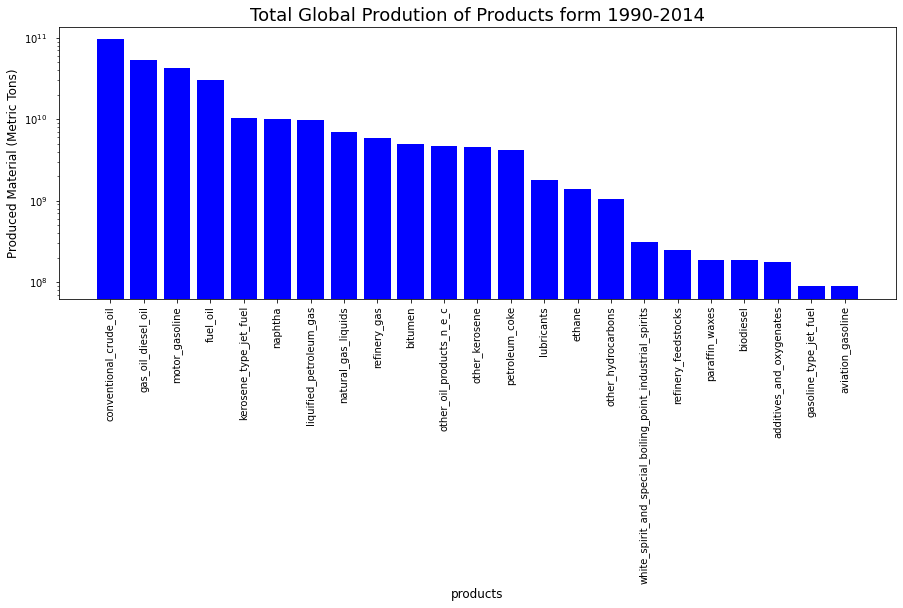

In [138]:
oil_products = oil_production['product']
oil_quantity = oil_production['quantity']*1000

fig, ax1 = plt.subplots(figsize=(15,5))


ax1.bar(oil_products, oil_quantity, color='blue')
ax1.tick_params('x', labelrotation=90)
ax1.tick_params('y', pad=8)
ax1.set_xlabel('products', fontsize=12)
ax1.set_ylabel('Produced Material (Metric Tons)', fontsize=12)
ax1.set_title('Total Global Prodution of Products form 1990-2014', fontsize=18)
ax1.set_yscale('log')



# Coal Peat and Oil Shale Production from all nations

In [35]:
Coal_Peat_or_Oil_Shales_df.head()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
4940,bulgaria,anthracite - commerce and public services,2014,"Metric tons, thousand",2.0,anthracite,Coal_Peat_or_Oil_Shales
4941,bulgaria,anthracite - commerce and public services,2013,"Metric tons, thousand",4.0,anthracite,Coal_Peat_or_Oil_Shales
4942,bulgaria,anthracite - commerce and public services,2012,"Metric tons, thousand",2.0,anthracite,Coal_Peat_or_Oil_Shales
4943,bulgaria,anthracite - commerce and public services,2011,"Metric tons, thousand",2.0,anthracite,Coal_Peat_or_Oil_Shales
4944,bulgaria,anthracite - commerce and public services,2010,"Metric tons, thousand",2.0,anthracite,Coal_Peat_or_Oil_Shales


In [36]:
# find total energy supply for each product in Coal_Peat_Oil_Shale(CPO) Class
Coal_Peat_or_Oil_Shales_df[Coal_Peat_or_Oil_Shales_df['commodity_transaction'].str.contains("coke oven")]

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
8415,romania,anthracite - own use by coke ovens,2014,"Metric tons, thousand",0.0,anthracite,Coal_Peat_or_Oil_Shales
8416,romania,anthracite - own use by coke ovens,2013,"Metric tons, thousand",0.0,anthracite,Coal_Peat_or_Oil_Shales
8417,romania,anthracite - own use by coke ovens,2012,"Metric tons, thousand",0.0,anthracite,Coal_Peat_or_Oil_Shales
8418,romania,anthracite - own use by coke ovens,2011,"Metric tons, thousand",0.0,anthracite,Coal_Peat_or_Oil_Shales
8419,romania,anthracite - own use by coke ovens,2010,"Metric tons, thousand",0.0,anthracite,Coal_Peat_or_Oil_Shales
...,...,...,...,...,...,...,...
1031355,new zealand,sub-bituminous coal - transformation in coke ovens,1994,"Metric tons, thousand",669.0,sub_bituminous_coal,Coal_Peat_or_Oil_Shales
1031356,new zealand,sub-bituminous coal - transformation in coke ovens,1993,"Metric tons, thousand",723.0,sub_bituminous_coal,Coal_Peat_or_Oil_Shales
1031357,new zealand,sub-bituminous coal - transformation in coke ovens,1992,"Metric tons, thousand",722.0,sub_bituminous_coal,Coal_Peat_or_Oil_Shales
1031358,new zealand,sub-bituminous coal - transformation in coke ovens,1991,"Metric tons, thousand",676.0,sub_bituminous_coal,Coal_Peat_or_Oil_Shales


In [37]:
cpo_production = Coal_Peat_or_Oil_Shales_df[Coal_Peat_or_Oil_Shales_df['commodity_transaction'].str.contains("production")]

In [38]:
cpo_production.head()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
8430,australia,anthracite - production,2014,"Metric tons, thousand",14.0,anthracite,Coal_Peat_or_Oil_Shales
8431,australia,anthracite - production,2013,"Metric tons, thousand",361.0,anthracite,Coal_Peat_or_Oil_Shales
8432,australia,anthracite - production,2012,"Metric tons, thousand",578.0,anthracite,Coal_Peat_or_Oil_Shales
8433,australia,anthracite - production,2011,"Metric tons, thousand",604.0,anthracite,Coal_Peat_or_Oil_Shales
8434,australia,anthracite - production,2010,"Metric tons, thousand",329.0,anthracite,Coal_Peat_or_Oil_Shales


In [39]:
cpo_production.unit.unique()
# Need to separate produced products measured in Metric tons form Terajoules or convert Terajoules of energy to Metric tons

array(['Metric tons,  thousand', 'Terajoules'], dtype=object)

In [40]:
cpo_production_energy = cpo_production[cpo_production['unit'] == 'Terajoules']

In [41]:
cpo_production_material = cpo_production[cpo_production['unit'] == 'Metric tons,  thousand']

In [42]:
cpo_production_energy.commodity_transaction.unique()
# There is only one product that is reported in terms of energy. 
# Coke oven gas is formed by heating coal to 1100 °C without access of air. The classic composition of coke gas: 
# hydrogen (H2 - 51%), methane (CH4 - 34%), carbon monoxide (CO - 10%), ethylene (C2H4 - 5%)

array(['coke oven gas - production'], dtype=object)

In [43]:
cpo_production_material.commodity_transaction.unique()

array(['anthracite - production', 'brown coal briquettes - production',
       'brown coal - production', 'coal tar - production',
       'coking coal - production', 'gas coke - production',
       'hard coal - production', 'lignite - production',
       'oil shale - production', 'other bituminous coal - production',
       'patent fuel - production', 'peat - production',
       'peat products - production', 'sub-bituminous coal - production'],
      dtype=object)

In [44]:
total_cpo_production = cpo_production.groupby(['product']).sum().round(2).drop(['year'], axis=1)
total_cpo_production = total_cpo_production.reset_index()
total_cpo_production = total_cpo_production.sort_values(by=['quantity'], ascending=False)

Text(-1, -0.65, '*Coke Oven Coke is reported in Terajoules because its production generates Coke Oven Gas')

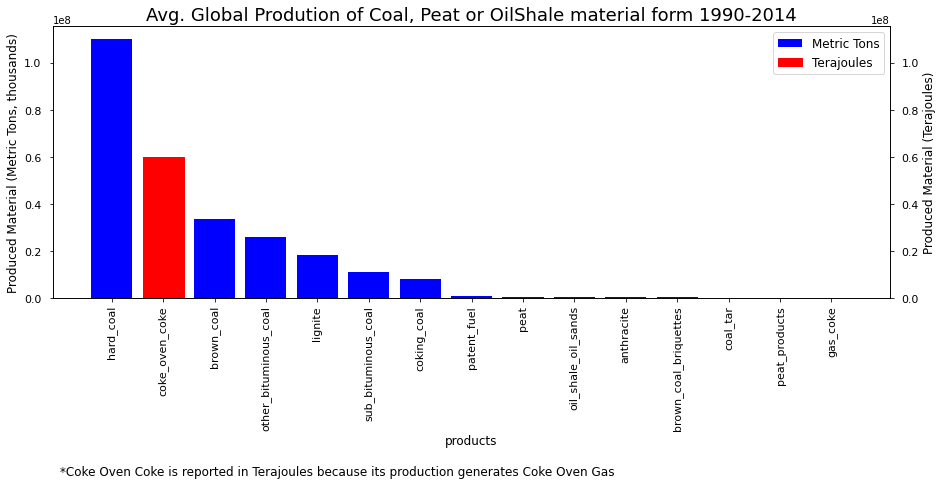

In [113]:
products = total_cpo_production['product']
quantity = total_cpo_production['quantity']

fig, ax1 = plt.subplots(figsize=(15,5))

ax1.bar(products, quantity)
ax1.tick_params('x', labelrotation=90, labelsize=11)
ax1.tick_params('y', pad=8, labelsize=11)
ax1.set_xlabel('products', fontsize=12)
ax1.set_ylabel('Produced Material (Metric Tons, thousands)', fontsize=12)
ax1.set_title('Avg. Global Prodution of Coal, Peat or OilShale material form 1990-2014', fontsize=18)
# ax1.ticklabel_format(scilimits= [3,3])

ax2=ax1.twinx() #instantiate a second axes that shares the same x-axis
ax2.bar(products, quantity)
ax2.set_ylabel('Produced Material (Terajoules)', fontsize=12)
ax2.tick_params('y', pad=8, labelsize=11)

barlist=plt.bar(products, quantity, color='blue')
barlist[1].set_color('red')

ax1.legend(handles=[barlist, barlist[1]], labels=['Metric Tons', 'Terajoules'], fontsize=12)


trans = ax1.get_xaxis_transform()
ax1.annotate('*Coke Oven Coke is reported in Terajoules because its production generates Coke Oven Gas', xy=(-1, -0.65), xycoords=trans, fontsize=12)

In [46]:
# lets look at the top 8 produced products over time

In [47]:
hard_coal_production = cpo_production[cpo_production['commodity_transaction'] == 'hard coal - production'].sort_values('year')
hard_coal_production = hard_coal_production.groupby(['year']).sum().round(3)
hard_coal_production = hard_coal_production.reset_index()

coke_oven_coke_production = cpo_production[cpo_production['commodity_transaction'] == 'coke oven gas - production'].sort_values('year')
coke_oven_coke_production = coke_oven_coke_production.groupby(['year']).sum().round(3)
coke_oven_coke_production = coke_oven_coke_production.reset_index()

sub_bituminous_coal_production = cpo_production[cpo_production['commodity_transaction'] == 'sub-bituminous coal - production'].sort_values('year')
sub_bituminous_coal_production = sub_bituminous_coal_production.groupby(['year']).sum().round(3)
sub_bituminous_coal_production = sub_bituminous_coal_production.reset_index()

other_bituminous_coal_production = cpo_production[cpo_production['commodity_transaction'] == 'other bituminous coal - production'].sort_values('year')
other_bituminous_coal_production = other_bituminous_coal_production.groupby(['year']).sum().round(3)
other_bituminous_coal_production = other_bituminous_coal_production.reset_index()


brown_coal_production = cpo_production[cpo_production['commodity_transaction'] == 'brown coal - production'].sort_values('year')
brown_coal_production = brown_coal_production.groupby(['year']).sum().round(3)
brown_coal_production = brown_coal_production.reset_index()

lignite_production = cpo_production[cpo_production['commodity_transaction'] == 'lignite - production'].sort_values('year')
lignite_production = lignite_production.groupby(['year']).sum().round(3)
lignite_production = lignite_production.reset_index()

coking_coal_production = cpo_production[cpo_production['commodity_transaction'] == 'coking coal - production'].sort_values('year')
coking_coal_production = coking_coal_production.groupby(['year']).sum().round(3)
coking_coal_production = coking_coal_production.reset_index()

oil_shale_oil_sands_production = cpo_production[cpo_production['commodity_transaction'] == 'oil shale - production'].sort_values('year')
oil_shale_oil_sands_production = oil_shale_oil_sands_production.groupby(['year']).sum().round(3)
oil_shale_oil_sands_production = oil_shale_oil_sands_production.reset_index()

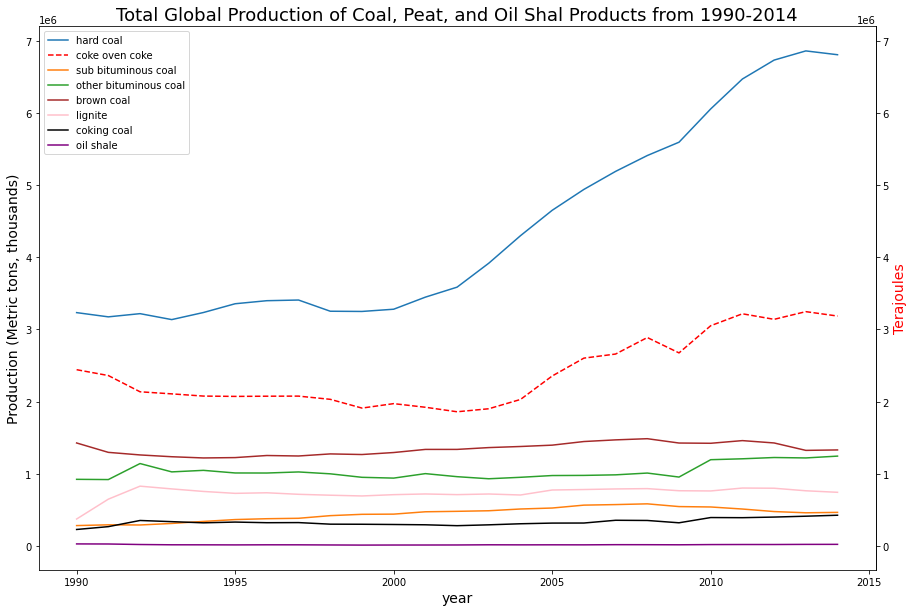

In [120]:
time = hard_coal_production['year']
hard_coal = hard_coal_production['quantity']
coke_oven_coke = coke_oven_coke_production['quantity']
sub_bituminous_coal = sub_bituminous_coal_production['quantity']
other_bituminous_coal = other_bituminous_coal_production['quantity']
brown_coal = brown_coal_production['quantity']
lignite = lignite_production['quantity']
coking_coal = coking_coal_production['quantity']
oil_shale_oil_sands = oil_shale_oil_sands_production['quantity']

fig, ax = plt.subplots(figsize = (15,10))


ax.plot(time, hard_coal, label='hard coal')
ax.plot(time, coke_oven_coke, linestyle = "dashed", label='coke oven coke', color = 'red')
ax.plot(time, sub_bituminous_coal, label='sub bituminous coal')
ax.plot(time, other_bituminous_coal, label='other bituminous coal')
ax.plot(time, brown_coal, label='brown coal', color='brown')
ax.plot(time, lignite, label='lignite', color='pink')
ax.plot(time, coking_coal, label='coking coal', color='black')
ax.plot(time, oil_shale_oil_sands, label='oil shale', color='purple')
# ax.ticklabel_format(scilimits= [3,3])

ax.legend()
ax.set_xlabel('year', fontsize=14)
ax.set_ylabel('Production (Metric tons, thousands)', fontsize=14)
ax.set_title('Total Global Production of Coal, Peat, and Oil Shal Products from 1990-2014', fontsize=18)

secax = ax.secondary_yaxis('right')
secax.set_ylabel('Terajoules', fontsize=14, color="red")


plt.show()



# Natural Manufactured or Recovered Natural Gas Production for all nations

In [49]:
# used found string, used groupby, reset index, and sorted values for last two product groups. Should be able to turn this
# into a function

# def production(x, y):
#     y = x[x['commodity_transaction'].str.contains("production")]
#     y = y.groupby(['product']).mean().round(2).drop(['year'], axis=1)
#     y = y.reset_index()
#     y = y.sort_values(by=['quantity'], ascending=False)

Natural_Manufactured_or_Recovered_Gas_Production = Natural_Manufactured_or_Recovered_Gas_df[Natural_Manufactured_or_Recovered_Gas_df['commodity_transaction'].str.contains("production")]
Natural_Manufactured_or_Recovered_Gas_Production = Natural_Manufactured_or_Recovered_Gas_Production.groupby(['product']).mean().round(2).drop(['year'], axis=1)
Natural_Manufactured_or_Recovered_Gas_Production = Natural_Manufactured_or_Recovered_Gas_Production.reset_index()
Natural_Manufactured_or_Recovered_Gas_Production = Natural_Manufactured_or_Recovered_Gas_Production.sort_values(by=['quantity'], ascending=False)


In [50]:
Natural_Manufactured_or_Recovered_Gas_Production

,product,quantity
2,natural_gas_including_lng,1237007.00
0,blast_furnace_gas,58871.79
1,gasworks_gas,48305.09
3,other_recovered_gases,12588.82


In [51]:
Natural_Manufactured_or_Recovered_Gas_df['product'].unique()

array(['blast_furnace_gas', 'gasworks_gas', 'natural_gas_including_lng',
       'other_recovered_gases'], dtype=object)

Text(0.5, 1.0, 'Avg. Global Prodution of Natrural, Maufactured and Recovered Gas form 1990-2014')

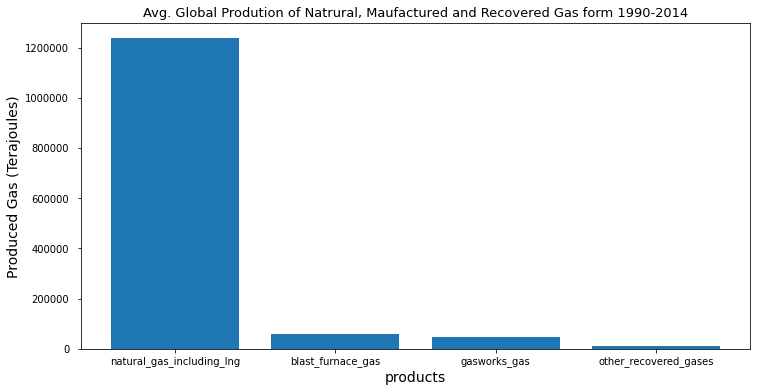

In [52]:
gas_products = Natural_Manufactured_or_Recovered_Gas_Production['product']
gas_quantity = Natural_Manufactured_or_Recovered_Gas_Production['quantity']

fig, ax1 = plt.subplots(figsize=(12,6))


ax1.bar(gas_products, gas_quantity)
ax1.tick_params('x', labelrotation=0)
ax1.tick_params('y', pad=8)
ax1.set_xlabel('products', fontsize=14)
ax1.set_ylabel('Produced Gas (Terajoules)', fontsize=14)
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_title('Avg. Global Prodution of Natrural, Maufactured and Recovered Gas form 1990-2014', fontsize=13)


# Electricity Production

In [140]:
Electricity_df['commodity_transaction'].unique()

array(['electricity generating capacity - from other sources - autoproducers',
       'electricity generating capacity - from other sources - main activity producers',
       'electricity generating capacity - from other sources - total',
       'electricity generating capacity - pumped hydro - autoproducers',
       'electricity generating capacity - pumped hydro - main activity producers',
       'electricity generating capacity - pumped hydro - total',
       'electricity generating capacity - solar pv - autoproducers',
       'electricity generating capacity - solar pv - main activity producers',
       'electricity generating capacity - solar pv - total',
       'electricity generating capacity - solar thermal - autoproducers',
       'electricity generating capacity - solar thermal - main activity producers',
       'electricity generating capacity - solar thermal - total',
       'electricity - net installed capacity of electric power plants, public combustible fuels',
       'e

In [141]:

Electricity_df[Electricity_df['commodity_transaction'].str.contains('electricity - total production, autoproducer')]

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
1133492,afghanistan,"electricity - total production, autoproducer",2014,"Kilowatt-hours, million",307.0,total_electricity,Electricity
1133493,afghanistan,"electricity - total production, autoproducer",2013,"Kilowatt-hours, million",276.0,total_electricity,Electricity
1133494,afghanistan,"electricity - total production, autoproducer",2012,"Kilowatt-hours, million",301.0,total_electricity,Electricity
1133495,afghanistan,"electricity - total production, autoproducer",2011,"Kilowatt-hours, million",286.0,total_electricity,Electricity
1133496,afghanistan,"electricity - total production, autoproducer",2010,"Kilowatt-hours, million",270.0,total_electricity,Electricity
...,...,...,...,...,...,...,...
1137163,zimbabwe,"electricity - total production, autoproducer",1996,"Kilowatt-hours, million",25.0,total_electricity,Electricity
1137164,zimbabwe,"electricity - total production, autoproducer",1995,"Kilowatt-hours, million",25.0,total_electricity,Electricity
1137165,zimbabwe,"electricity - total production, autoproducer",1994,"Kilowatt-hours, million",23.0,total_electricity,Electricity
1137166,zimbabwe,"electricity - total production, autoproducer",1993,"Kilowatt-hours, million",25.0,total_electricity,Electricity


In [142]:
# production of electricity comes from autoproducers or main activity plants
electricity_production = Electricity_df[Electricity_df['commodity_transaction'].str.contains("autoproducer|main activity")]

In [143]:
electricity_production['commodity_transaction'].unique()

array(['electricity generating capacity - from other sources - autoproducers',
       'electricity generating capacity - from other sources - main activity producers',
       'electricity generating capacity - pumped hydro - autoproducers',
       'electricity generating capacity - pumped hydro - main activity producers',
       'electricity generating capacity - solar pv - autoproducers',
       'electricity generating capacity - solar pv - main activity producers',
       'electricity generating capacity - solar thermal - autoproducers',
       'electricity generating capacity - solar thermal - main activity producers',
       'electricity - total net installed capacity of electric power plants, autoproducer',
       'electricity - total net installed capacity of electric power plants, main activity',
       'electricity - total net installed capacity of electric power plants, main activity & autoproducer',
       'electricity - total production, autoproducer',
       'electricity - 

In [144]:
electricity_production = electricity_production.groupby(['commodity_transaction']).sum().round(2).drop(['year'], axis=1)
electricity_production = electricity_production.reset_index()

In [145]:
# create new dataframe for rows refering to electric capacity and
# drop the same rows in electricity_production

electric_capacity = electricity_production[electricity_production['commodity_transaction'].str.contains("capacity")]

In [146]:
electricity_production = electricity_production.iloc[13:]

In [147]:
electricity_production = electricity_production.sort_values(by=['quantity'], ascending=False)

Text(0.5, 1.0, 'Avg. Global Prodution of Electricity form 1990-2014')

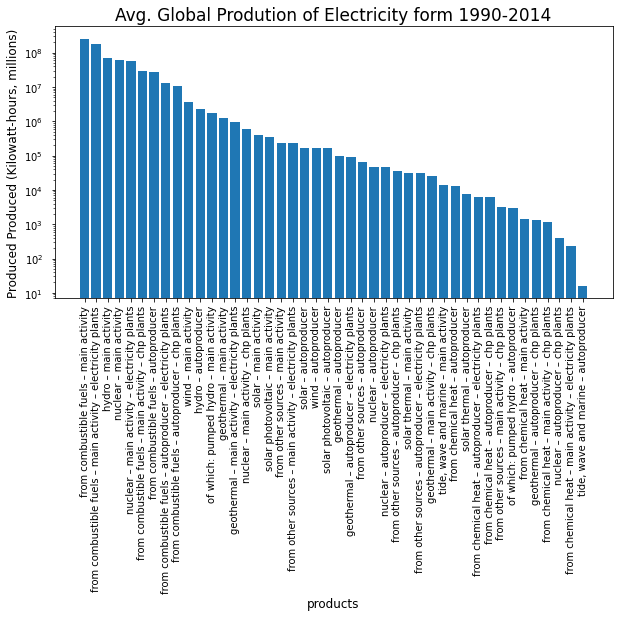

In [148]:
electric_products = electricity_production['commodity_transaction']
electric_quantity = electricity_production['quantity']

fig, ax1 = plt.subplots(figsize=(10,5))


ax1.bar(electric_products, electric_quantity)
ax1.tick_params('x', labelrotation=90)
ax1.tick_params('y', pad=8)
ax1.set_xlabel('products', fontsize=12)
ax1.set_ylabel('Produced Produced (Kilowatt-hours, millions)', fontsize=12)
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_yscale('log')
ax1.set_title('Avg. Global Prodution of Electricity form 1990-2014', fontsize=17)

In [62]:
# total electricity category is vague. It doesn't seem right that nuclear energy generated the most electricity globally
# What about electricity generated from coal, oil, natural gas??

In [63]:
combustion_fuels_elec_prod = Electricity_df[Electricity_df['commodity_transaction'].str.contains("from combustible fuels")]
combustion_fuels_elec_prod.head()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
1143312,afghanistan,from combustible fuels – autoproducer,2014,"Kilowatt-hours, million",5.0,total_electricity,Electricity
1143313,afghanistan,from combustible fuels – autoproducer,2013,"Kilowatt-hours, million",5.0,total_electricity,Electricity
1143314,afghanistan,from combustible fuels – autoproducer,2012,"Kilowatt-hours, million",5.0,total_electricity,Electricity
1143315,afghanistan,from combustible fuels – autoproducer,2011,"Kilowatt-hours, million",5.0,total_electricity,Electricity
1143316,afghanistan,from combustible fuels – autoproducer,2010,"Kilowatt-hours, million",5.0,total_electricity,Electricity


In [64]:
combustion_fuels_elec_prod.groupby(['commodity_transaction']).mean().round(2).drop(['year'], axis=1)

,quantity
commodity_transaction,
from combustible fuels – autoproducer,7837.73
from combustible fuels – autoproducer – chp plants,11573.77
from combustible fuels – autoproducer – electricity plants,7560.84
from combustible fuels – main activity,46751.88
from combustible fuels – main activity – chp plants,32858.65
from combustible fuels – main activity – electricity plants,66038.49


In [65]:
combustion_fuels_elec_prod.groupby(['commodity_transaction']).mean().round(2).drop(['year'], axis=1).sum()
# this is more than double than the average annual electricity output from nuclear

quantity    172621.36
dtype: float64

In [66]:
nuclear_production = Electricity_df[Electricity_df['commodity_transaction'].str.contains("nuclear – ")]

In [67]:
nuclear_production['commodity_transaction'].unique()

array(['nuclear – autoproducer', 'nuclear – autoproducer – chp plants',
       'nuclear – autoproducer – electricity plants',
       'nuclear – main activity', 'nuclear – main activity – chp plants',
       'nuclear – main activity – electricity plants'], dtype=object)

In [68]:
nuclear_production.groupby(['commodity_transaction']).mean().round(2).drop(['year'], axis=1)

,quantity
commodity_transaction,
nuclear – autoproducer,1406.79
nuclear – autoproducer – chp plants,79.00
nuclear – autoproducer – electricity plants,1655.00
nuclear – main activity,82722.88
nuclear – main activity – chp plants,12377.21
nuclear – main activity – electricity plants,106007.71


In [69]:
# lets unpack total_electricity product group

In [70]:
total_electricity = Electricity_df[Electricity_df['product'].str.contains("total_electricity")]


In [71]:
total_electricity['commodity_transaction'].unique()
# total_electricity product group contains production of from chemical heat, comubstible fuels, orther sources, geothermal
# hydro, nuclear, pumpedhydro,solar, tidal, and wind

array(['electricity - consumption by chemical and petrochemical',
       'electricity - consumption by commercial and public services',
       'electricity - consumption by construction',
       'electricity - consumption by food and tobacco',
       'electricity - consumption by households',
       'electricity - consumption by iron and steel',
       'electricity - consumption by machinery',
       'electricity - consumption by manufacturing, construction and non-fuel industry',
       'electricity - consumption by mining and quarrying',
       'electricity - consumption by non-ferrous metals',
       'electricity - consumption by non-metallic minerals',
       'electricity - consumption by other',
       'electricity - consumption by other manuf., const. and non-fuel ind.',
       'electricity - consumption by paper, pulp and print',
       'electricity - consumption by pipeline transport',
       'electricity - consumption by rail',
       'electricity - consumption by road',
     

In [72]:
total_electricity_production = total_electricity[total_electricity['commodity_transaction'].str.contains("production")]